DATASET COLUMNS FEATURE EXPLAINATION

    - Age (age in years)
    - Sex (1 = male; 0 = female)
    - CP (chest pain type)
    - TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
    - CHOL (serum cholestoral in mg/dl)
    - FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - RESTECH (resting electrocardiographic results)
    - THALACH (maximum heart rate achieved)
    - EXANG (exercise induced angina (1 = yes; 0 = no))
    - OLDPEAK (ST depression induced by exercise relative to rest)
    - SLOPE (the slope of the peak exercise ST segment)
    - CA (number of major vessels (0-3) colored by flourosopy)
    - THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
    - TARGET (1 or 0)

In [54]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
# print(os.listdir("../input"))

In [11]:
data = pd.read_csv('heart.csv')
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
data.describe()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Sex       303 non-null    int64  
 2   Cp        303 non-null    int64  
 3   Trestbps  303 non-null    int64  
 4   Chol      303 non-null    int64  
 5   Fbs       303 non-null    int64  
 6   Restecg   303 non-null    int64  
 7   Thalach   303 non-null    int64  
 8   Exang     303 non-null    int64  
 9   Oldpeak   303 non-null    float64
 10  Slope     303 non-null    int64  
 11  Ca        303 non-null    int64  
 12  Thal      303 non-null    int64  
 13  Target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
data.shape

(303, 14)

In [15]:
data.isnull().sum()

Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

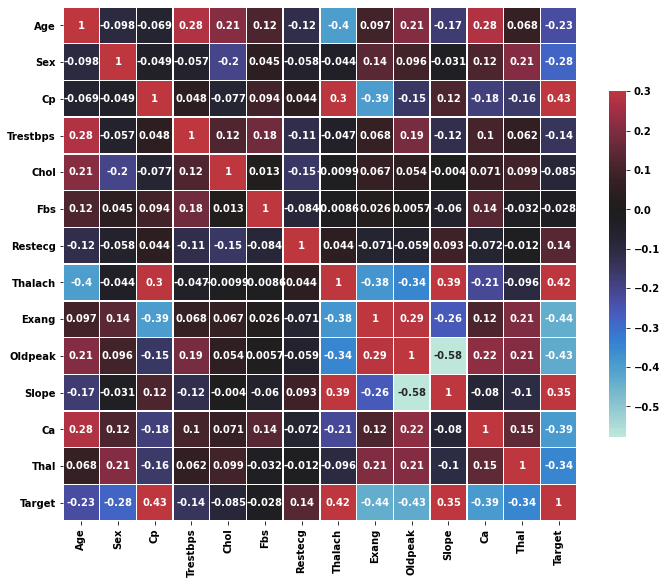

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

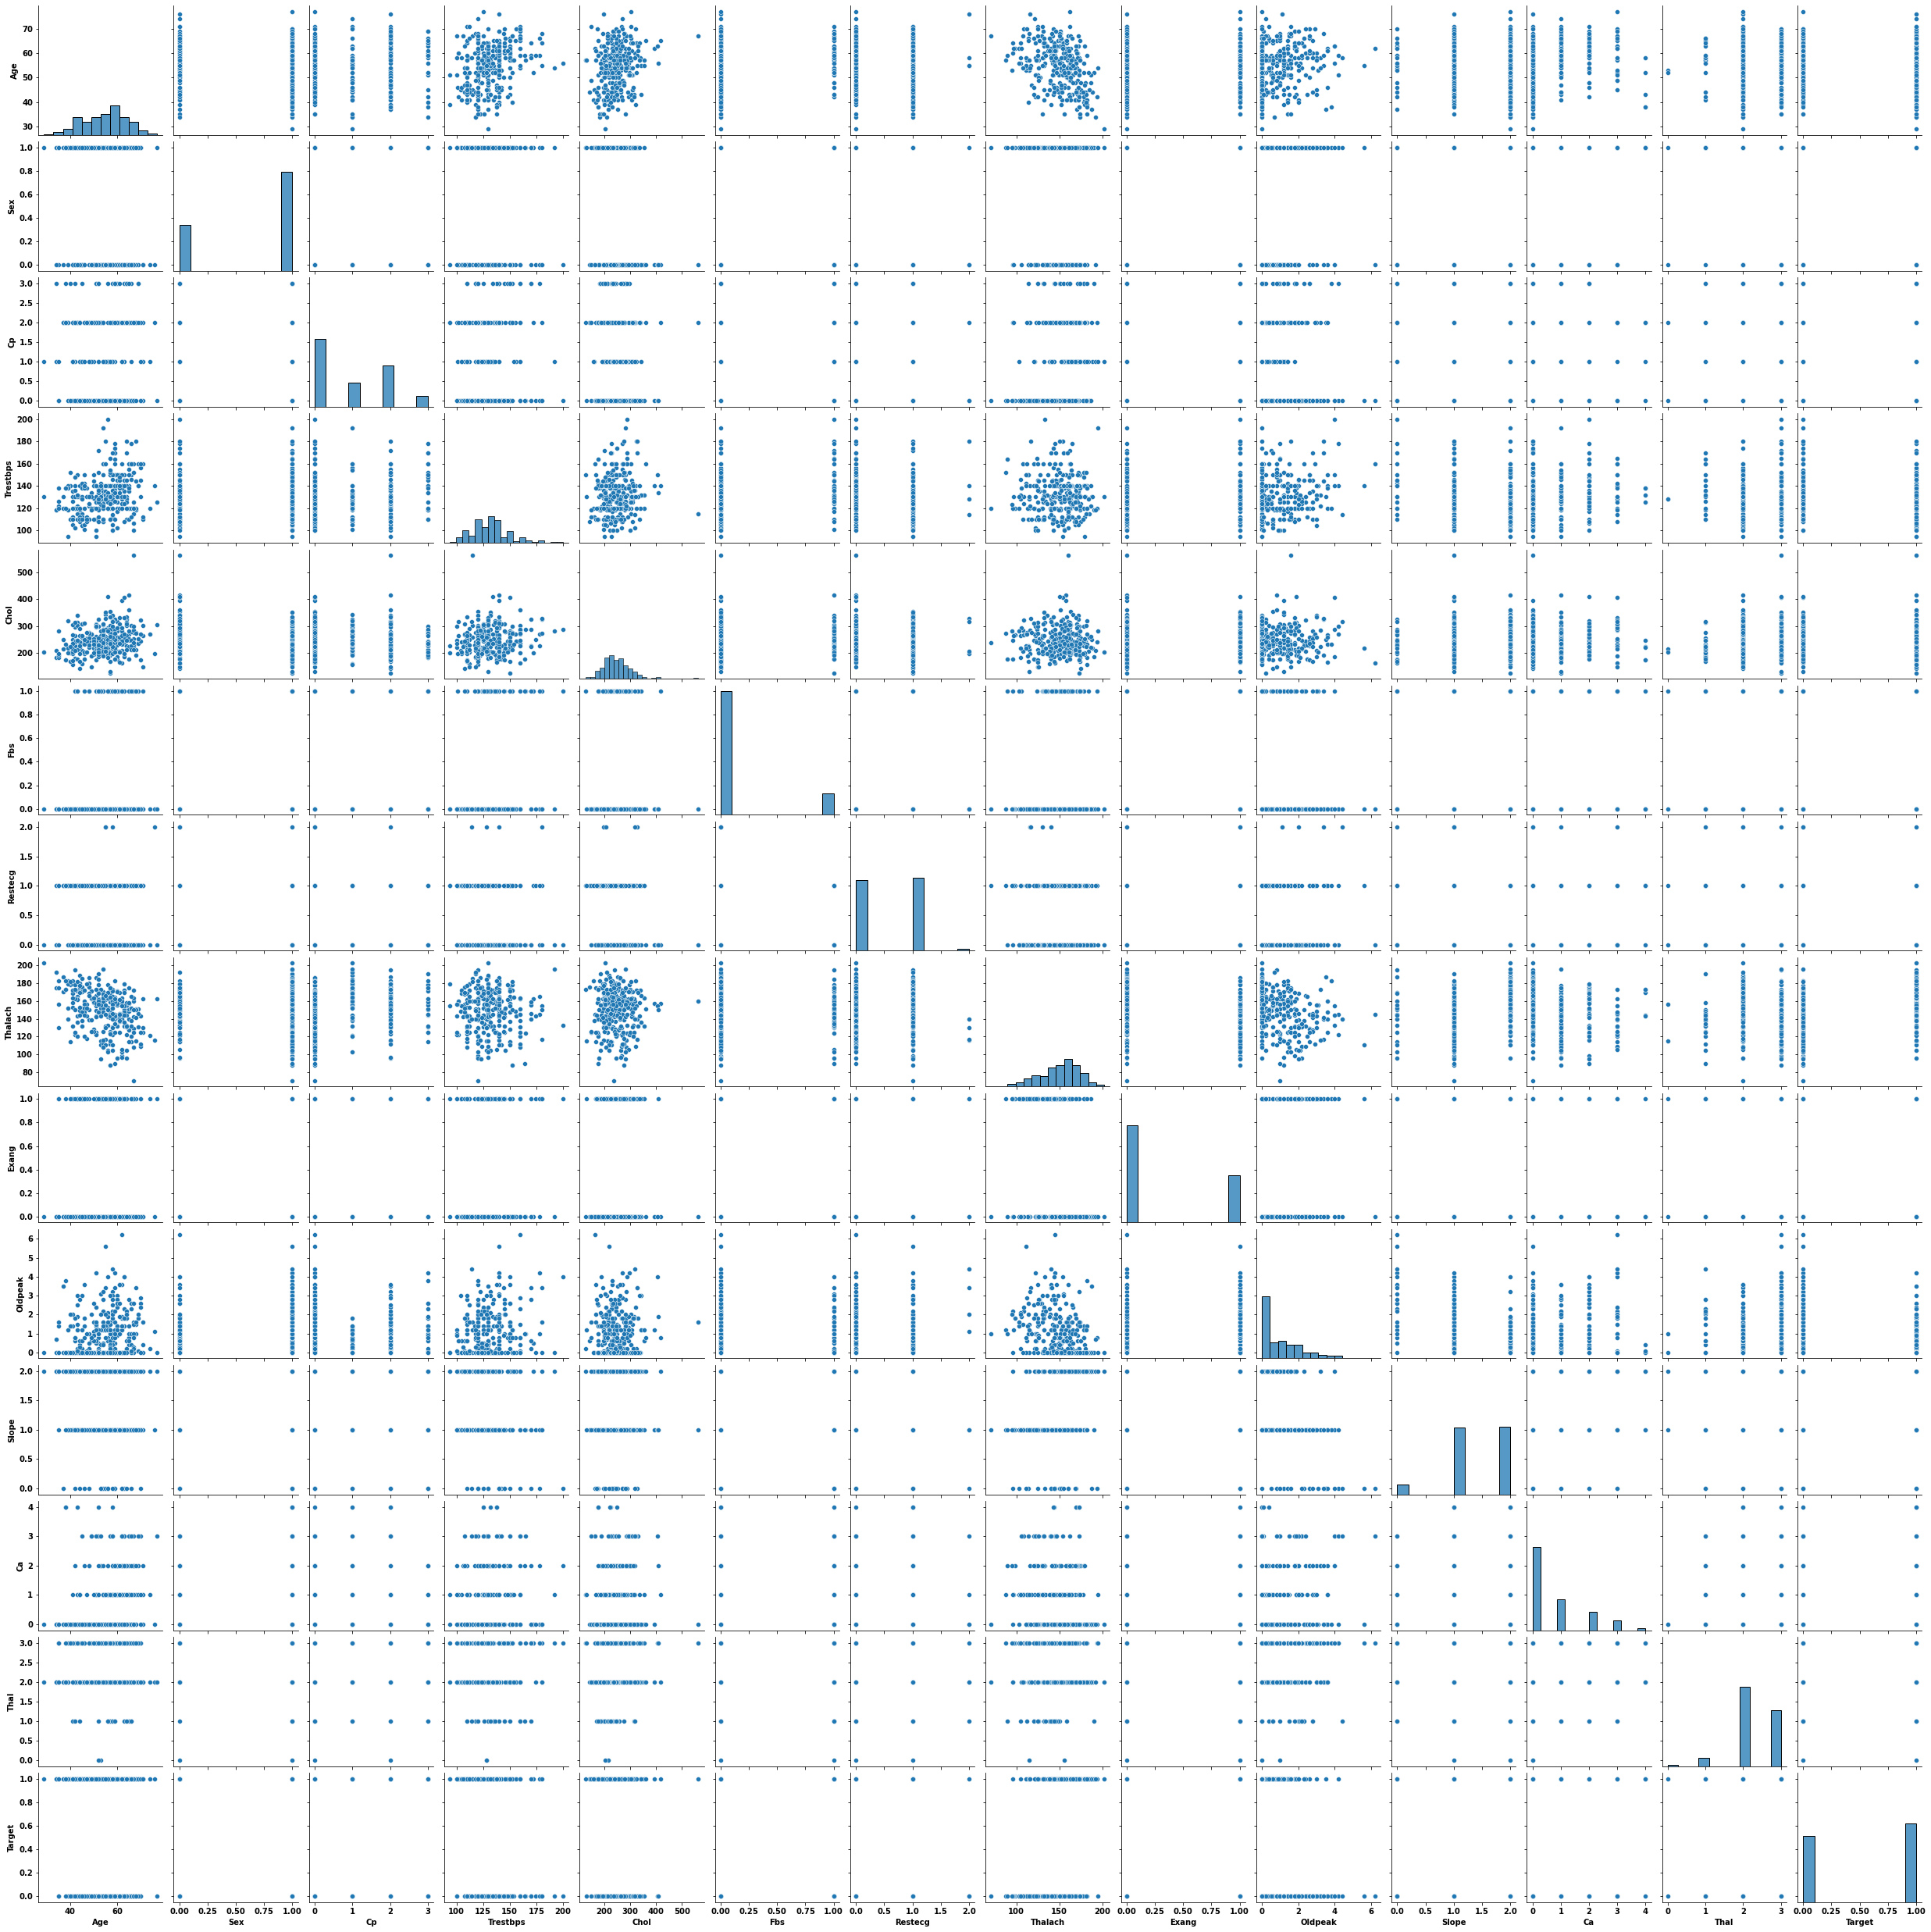

In [18]:
sns.pairplot(data)
plt.show()

***AGE***

In [20]:
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [21]:
young_ages=data[(data.Age>=29)&(data.Age<40)]
middle_ages=data[(data.Age>=40)&(data.Age<55)]
elderly_ages=data[(data.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


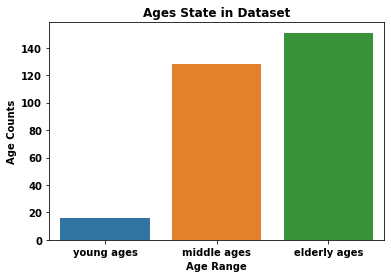

In [22]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

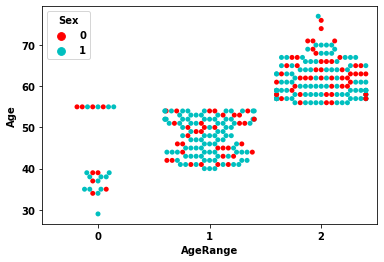

In [24]:
data['AgeRange']=0
youngAge_index=data[(data.Age>=29)&(data.Age<40)].index
middleAge_index=data[(data.Age>=40)&(data.Age<55)].index
elderlyAge_index=data[(data.Age>55)].index

for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0
    
sns.swarmplot(x="AgeRange", y="Age",hue='Sex',
              palette=["r", "c", "y"], data=data)
plt.show()

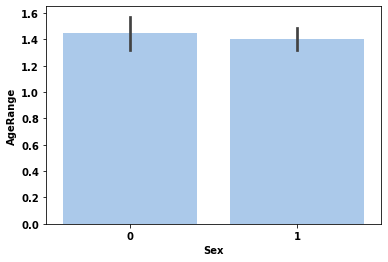

In [25]:
sns.set_color_codes("pastel")
sns.barplot(y="AgeRange", x="Sex", data=data,
            label="Total", color="b")
plt.show()

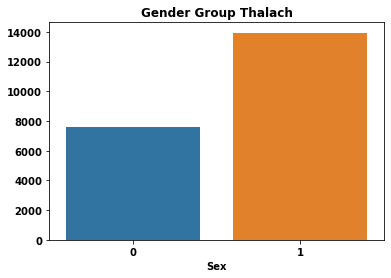

In [27]:
sns.barplot(x=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').index,y=elderly_ages.groupby(elderly_ages['Sex'])['Thalach'].agg('sum').values)
plt.title("Gender Group Thalach")
plt.show()

***Gender***

In [30]:
total_genders_count=len(data.Sex)
male_count=len(data[data['Sex']==1])
female_count=len(data[data['Sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


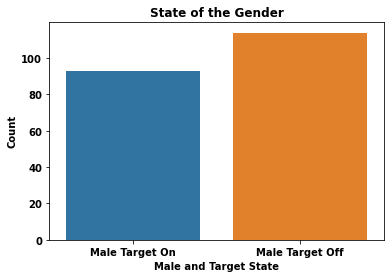

In [31]:
male_andtarget_on=len(data[(data.Sex==1)&(data['Target']==1)])
male_andtarget_off=len(data[(data.Sex==1)&(data['Target']==0)])
####
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

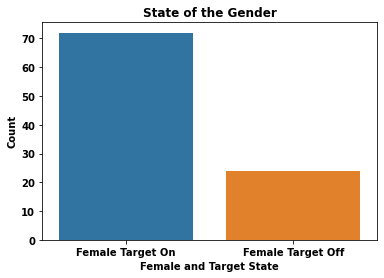

In [32]:
#Female State & target 1 & 0
female_andtarget_on=len(data[(data.Sex==0)&(data['Target']==1)])
female_andtarget_off=len(data[(data.Sex==0)&(data['Target']==0)])
####
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

***Chest pain***

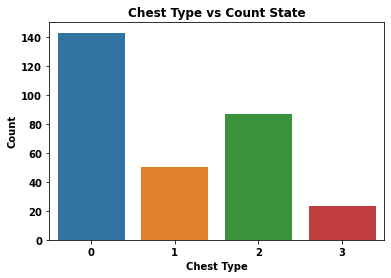

In [34]:
sns.countplot(data.Cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

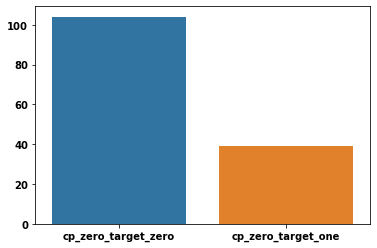

In [35]:
cp_zero_target_zero=len(data[(data.Cp==0)&(data.Target==0)])
cp_zero_target_one=len(data[(data.Cp==0)&(data.Target==1)])
sns.barplot(x=['cp_zero_target_zero','cp_zero_target_one'],y=[cp_zero_target_zero,cp_zero_target_one])
plt.show()

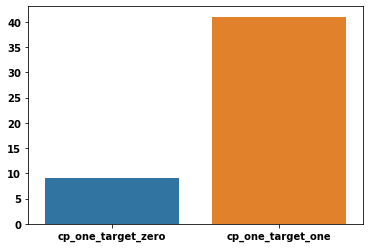

In [36]:
cp_one_target_zero=len(data[(data.Cp==1)&(data.Target==0)])
cp_one_target_one=len(data[(data.Cp==1)&(data.Target==1)])
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()

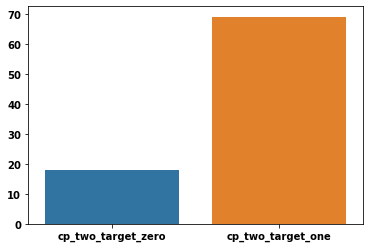

In [37]:
cp_two_target_zero=len(data[(data.Cp==2)&(data.Target==0)])
cp_two_target_one=len(data[(data.Cp==2)&(data.Target==1)])
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

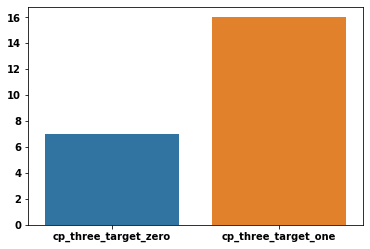

In [38]:
cp_three_target_zero=len(data[(data.Cp==3)&(data.Target==0)])
cp_three_target_one=len(data[(data.Cp==3)&(data.Target==1)])
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()

As a result of the above analyzes, it can be seen that 0 cases with chest pain are less common with heart disease. But on the other hand, there are problems in all cases of chest pain, such as 1,2,3.

***Thalach***

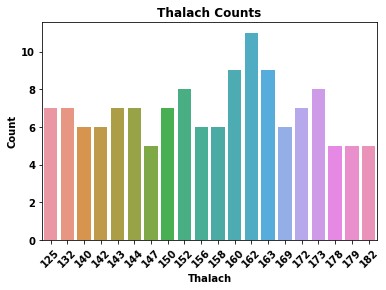

In [39]:
sns.barplot(x=data.Thalach.value_counts()[:20].index,y=data.Thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

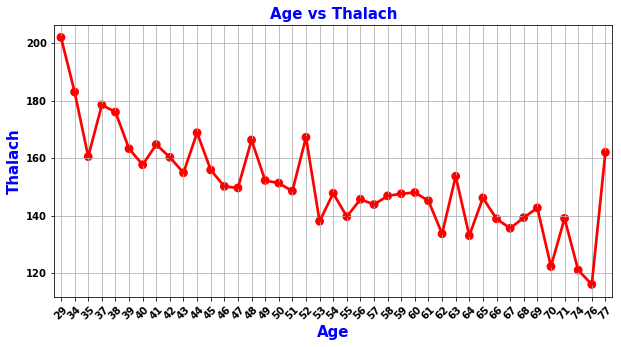

In [41]:
age_unique=sorted(data.Age.unique())
age_thalach_values=data.groupby('Age')['Thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['Age']==age].Thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

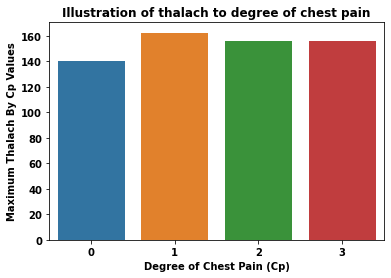

In [42]:
cp_thalach=data.groupby('Cp')['Thalach'].mean()
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()

***Thal***

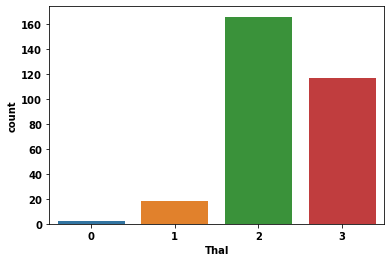

In [43]:
sns.countplot(data.Thal)
plt.show()

In [45]:
#Target 1
a=len(data[(data['Target']==1)&(data['Thal']==0)])
b=len(data[(data['Target']==1)&(data['Thal']==1)])
c=len(data[(data['Target']==1)&(data['Thal']==2)])
d=len(data[(data['Target']==1)&(data['Thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

#so,Apparently, there is a rate at Thal 2.Now, draw graph
print('*'*50)
#Target 0
e=len(data[(data['Target']==0)&(data['Thal']==0)])
f=len(data[(data['Target']==0)&(data['Thal']==1)])
g=len(data[(data['Target']==0)&(data['Thal']==2)])
h=len(data[(data['Target']==0)&(data['Thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  1
Target 1 Thal 1:  6
Target 1 Thal 2:  130
Target 1 Thal 3:  28
**************************************************
Target 0 Thal 0:  1
Target 0 Thal 1:  12
Target 0 Thal 2:  36
Target 0 Thal 3:  89


***Target***

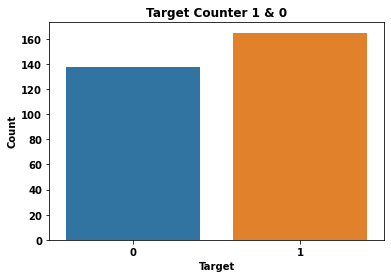

In [47]:
sns.countplot(data.Target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter 1 & 0')
plt.show()

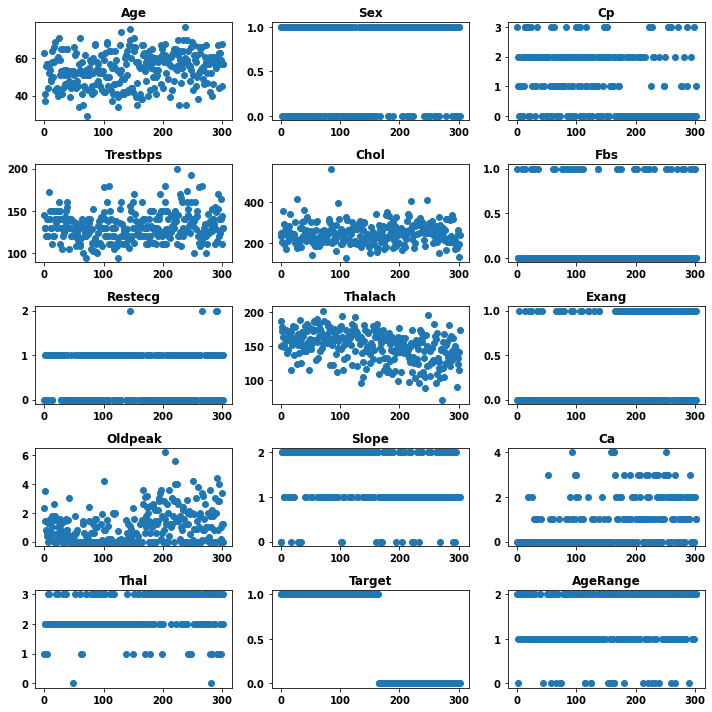

In [48]:
for i,col in enumerate(data.columns.values):
    plt.subplot(5,3,i+1)
    plt.scatter([i for i in range(303)],data[col].values.tolist())
    plt.title(col)
    fig,ax=plt.gcf(),plt.gca()
    fig.set_size_inches(10,10)
    plt.tight_layout()
plt.show()

***Training***

In [65]:
X = data.drop(['Target', ], axis=1)
X.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,2


In [66]:
y = data['Target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Target, dtype: int64

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 14) (242,)
Test set: (61, 14) (61,)


In [74]:
def plot_confusion_matrix(y, pred, labels, classes, normalize=False, cmap=plt.cm.Blues):
    """
    Plots the confusion matrix.
    Args:
        y: Data Labels
        pred: Predicted outputs
        labels: A list of label values to calculate confusion matrix
        classes: A list of containing unique class names for plotting
        normalize:Wheter to plot data with int or percentage values. Default is int.
        cmap: Color map pf the plot
    
    """
    cm = confusion_matrix(y, pred, labels=labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def best_model(model, train, test, grid_params):
    """
    Takes a model and grid params as an input and finds the best model.
    
    Args:
        model: A model class
        train: A dict containing train features as X and labels as y
        test: A dict containing test features as X and labels as y
        grid_params: GridSearchCV parameters
        
    Returns:
        best_estimator, table and best_params
    """
    
    grid = GridSearchCV(model, grid_params, cv=4, scoring='f1_weighted', 
                        n_jobs=-1, return_train_score=True).fit(train['X'], train['y'])
    estimator = grid.best_estimator_
    table = pd.DataFrame(grid.cv_results_).loc[:, 
                ['params', 'mean_test_score', 'std_test_score','mean_train_score', 
                 'std_train_score']].sort_values(by='mean_test_score', ascending=False)
    
    params = grid.best_params_
    preds = estimator.predict(test['X'])
    plot_confusion_matrix(test['y'], preds, labels=[1, 0], classes=['target=1','target=0'])
    print(classification_report(test['y'], preds))
    
    return estimator, table, params

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.92      0.92      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



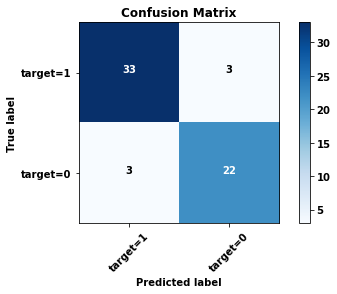

In [75]:
from sklearn.linear_model import LogisticRegression
import itertools

lr = LogisticRegression()

est, table, params = best_model(lr, train={'X': X_train, 'y': y_train},
                                test={'X': X_test, 'y':y_test},
                                grid_params=[{'solver':['liblinear', 'sag', 'newton-cg', 'lbfgs'], 'C': [0.01, 0.05, 0.1, 0.5, 1, 5]}])

In [76]:
est.predict_proba(X_test)[0:5]

array([[0.31018346, 0.68981654],
       [0.91181463, 0.08818537],
       [0.51878992, 0.48121008],
       [0.02823647, 0.97176353],
       [0.25310027, 0.74689973]])